 ## Домашнее задание Проверка гипотез

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
def check_normality(data):
    stat, p = st.shapiro(data) # тест Шапиро-Уилка на проверку нормальности данных
    if p < 0.05: #условие статистической значимости
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
dnorm = st.norm.rvs(loc = 45, scale = 15, size = 100) #генерация выборки с нормальным распеделением. среднее 45, ско 15, размер 100
print(f'Среднее выборки - {dnorm.mean()}')
# print (f'Стандартное отклонение выборки - {st.sem(dnorm)}')

print(dnorm.std())

Среднее выборки - 45.89299085691635
14.466883014875998


<Axes: ylabel='Count'>

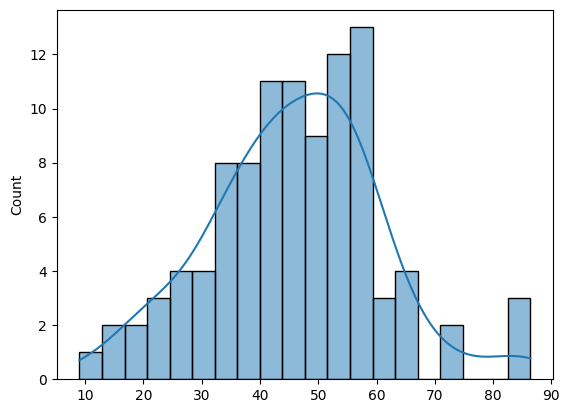

In [ ]:
sns.histplot(data = dnorm, kde = True, bins = 20) # гистограмма нормального распределения

In [ ]:
check_normality(dnorm)

Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
# теперь проверю этот тест на заведомо ненормальных данных, распределение Пуассона
pois = np.random.poisson(2,100)

<Axes: ylabel='Count'>

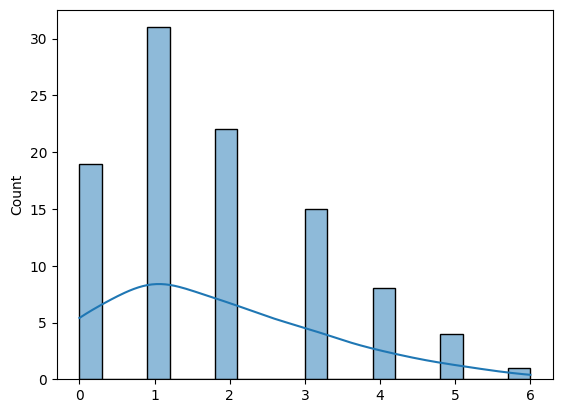

In [ ]:
sns.histplot(data = pois, kde = True, bins = 20) # гистограмма распределения Пуассона

In [ ]:
check_normality(pois)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [ ]:
type(mens)

numpy.ndarray

Т.к. значений в выборке много, то тест будет чувствительным и небольшие различия в значениях будет считать как статистически значимые. Чтобы избежать этого определяем количество значений в выборке, при котром праметры выборки будут такими же как в генеральной совокупности. И т-тест Стьюдента буду проводить по этой выборке.

In [ ]:
sigma = 10 #стандартное отклонение
alfa = 0.001 # уровень значимости
delta = 1 # допустимая погрешность измерения - 1см

In [ ]:
z = st.norm.ppf(1-alfa/2) # квантиль нормального распределения с уровнем 1-а/2
z

3.2905267314919255

In [ ]:
n_req = int(np.ceil((z*sigma/delta)**2)) # требуемое количество значений
n_req

1083

In [ ]:
# теперь из генеральных выборок значений для мужчин и женщин выберу выборки с 1083 значениями
s_mens = np.random.choice(mens, n_req)
s_womens = np.random.choice(womens, n_req)

2.1. Т-тест Стьюдента                     
Н0 - выборки равны                   
Н1 - выборки неравны

In [ ]:
stat, p = st.ttest_ind(s_mens, s_womens, equal_var = True) # equal_var = True, т.к. дисперсии выборок одинаковые
print(f'Статистика - {stat}, p - {p}')
if p < 0.001:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Статистика - 2.6705725747888023, p - 0.007628882583386167
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


2.2. Визуальные различия в выборках

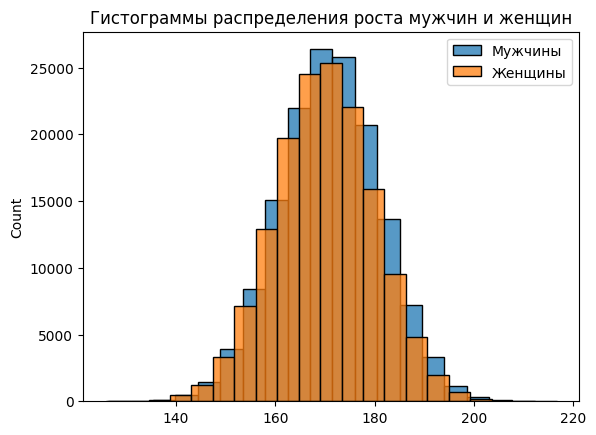

In [ ]:
sns.histplot(data = mens, bins = 20)
sns.histplot(data = womens, bins = 20)
plt.title('Гистограммы распределения роста мужчин и женщин')
plt.legend(['Мужчины', 'Женщины'], loc = 'best')
plt.show()


Вывод. По графикам видно, что выборки практически накладываются друг на друга. Похоже, что выборки одинаковые.

3.3. Является ли результат полезным с практической точки зрения? Почему да или нет?                                     
На мой взгляд, для конкретно заданных выборок, результат не очень полезен, т.к. изначально задана разница в среднем значении роста мужчин и женщин в 1 см и с одинаковым стандартным отклонением. Измерять рост людей с высокой точностью (до миллиметра и или до 5мм) нет смысла. Не понятно в какой области может понадобится такая точность, а если брать точность измерения роста уже 1см, то она равна разнице между средними выборок - т.е. выборки заведомо будут сильно пересекаться.

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

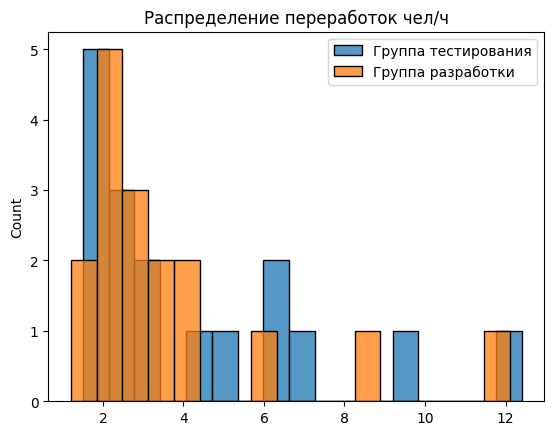

In [ ]:
# Визуализация данных
sns.histplot(test_team, bins = 17)
sns.histplot(developer_team, bins = 17)
plt.title('Распределение переработок чел/ч')
plt.legend(['Группа тестирования', 'Группа разработки'], loc = 'best')
plt.show()

Судя по гистограмме обе команды перерабатывают примерно одинаково, но распределение не похоже на нормальное.

In [ ]:
# Проверка гипотезы нормальности данных для тестировщиков с помощью функции check_normality(data), написанной в задании 1
check_normality(test_team)
check_normality(developer_team)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Т.к. данные распределены не нормально используем тест Манна-Уитни.             
Н0 - Распределения одинаковые                 
Н1 - Распределения различаются               

In [ ]:
stat, p = st.mannwhitneyu(test_team, developer_team)
print(f'Статистика {stat:.5f}, р - {p:.5f}')
if p < 0.05:
  print(f'Отколняем нулевую гипотезу, выборки, вероятно, различаются')
else:
  print(f'Принимаем нулевую гипотезу, выборки, вероятно, одинаковые')

Статистика 151.50000, р - 0.82265
Принимаем нулевую гипотезу, выборки, вероятно, одинаковые


Вывод: с вероятностью 95% разницы в переработках двух групп нет

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

Графическое представление распределения данных.

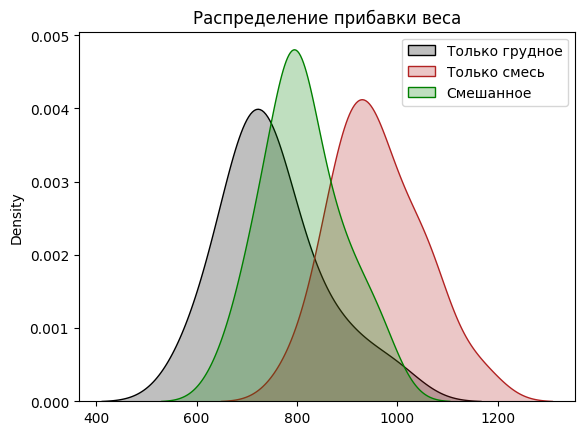

In [ ]:
sns.kdeplot(only_breast, label = 'Только грудное', fill = True, color = '#000000')
sns.kdeplot(only_formula, label = 'Только смесь', fill = True, color = '#B22222')
sns.kdeplot(both, label = 'Смешанное', fill = True, color = '#008000')
plt.title('Распределение прибавки веса')
plt.legend(['Только грудное', 'Только смесь', 'Смешанное'], loc = 'best')

Все три распределения похожи на нормальные.
Проверю при помощи функции, написанной в п.3.1.

In [ ]:
print('Проверка распределния ежемесячного прироста веса для:')
print('Только грудное вскармливание')
check_normality(only_breast)
print('Только смесь')
check_normality(only_formula)
print('Смешанное кормление')
check_normality(both)

Проверка распределния ежемесячного прироста веса для:
Только грудное вскармливание
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Только смесь
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Смешанное кормление
Не отклоняем нулевую гипотезу >> Данные распределены нормально


Проверю нормальность распределени при помощи графика

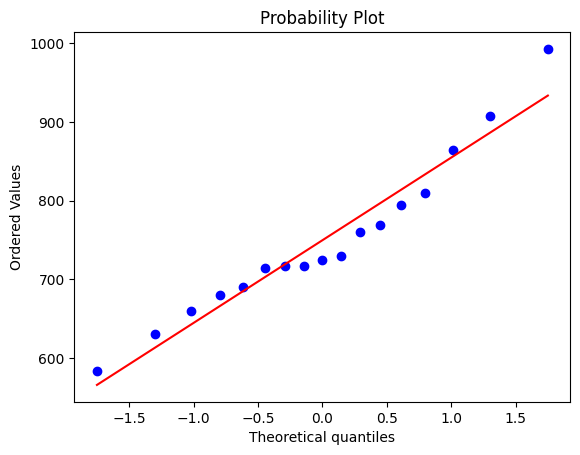

In [ ]:
res1 = st.probplot(only_breast, plot=plt) #похоже на нормальное

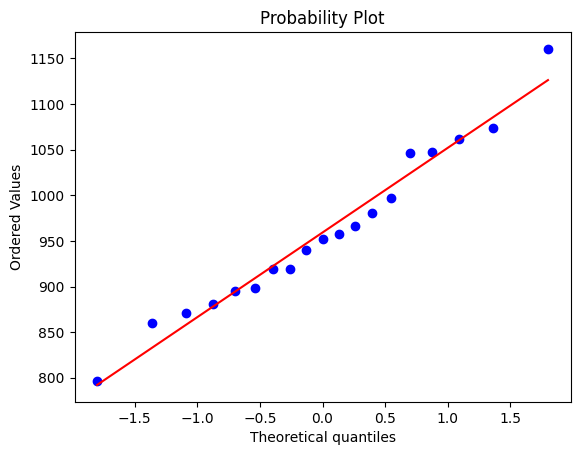

In [ ]:
res1 = st.probplot(only_formula, plot=plt) #похоже на нормальное

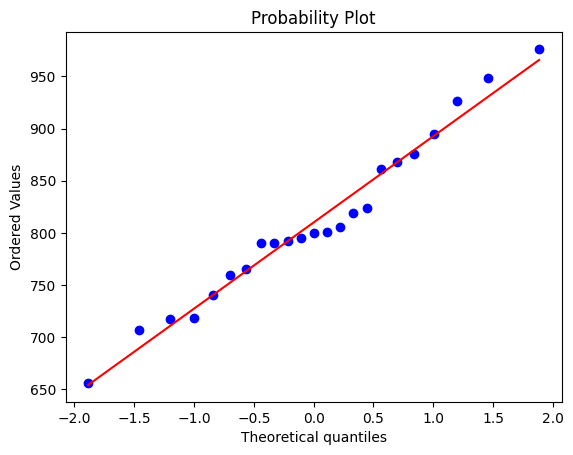

In [ ]:
res1 = st.probplot(both, plot=plt) #похоже на нормальное

Т.к. выборок три, то гипотезу будем проверять с помощью дисперсионного анализа.         
Перед проверкой проверим равность вариаций.

In [ ]:
stat, p = st.levene(only_breast, only_formula, both)
print(f'Статистика {stat}, p {p}')
if p < 0.05:
  print(f'Отклоняем нулевую гипотезу, вероятно, вариации разные')
else:
  print(f'Принимаем нулевую гипотезу, вероятно, вариации равны')

Статистика 0.266118612498075, p 0.7673118764998224
Принимаем нулевую гипотезу, вероятно, вариации равны


Далее проверяем выборки при помощи однофакторного дисперсионного анализа

In [ ]:
fvalue, pvalue = st.f_oneway(only_breast, only_formula, both)
print(f'Статистика f-value {fvalue:.5f}, статистика p-value {fvalue:.5f}')
if pvalue < 0.05:
  print('Отклоняем нулевую гипотезу, вероятно средние различаются')
else:
  print('Принимаем нулевую гипотезу, вероятно средние одинаковые')

Статистика f-value 26.70125, статистика p-value 26.70125
Отклоняем нулевую гипотезу, вероятно средние различаются


Далее более детальное исследование выполняем при помощи множественного сравнения - критерий Тьюки

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Объединяю данные в датафрейм для передачи их потом в функцию вычисления критерия Тьюки.                      
H0 - средние значения групп равны                          
Н1 - средние значения групп различны

In [ ]:
w_gain_b = pd.DataFrame(only_breast, columns = ['weight_gane']) # значения прибавок веса для группы только грудного вскармливания
w_gain_b['group'] = 'only_breast' #добавляю столбец с елиным значением группы для всех данных из этого набора
w_gain_f = pd.DataFrame(only_formula, columns = ['weight_gane']) # то же для вскармливании на смеси
w_gain_f['group'] = 'only_formula'
w_gain_both = pd.DataFrame(both, columns = ['weight_gane']) # то же для смешанного вскармливании
w_gain_both['group'] = 'both'
w_gain = pd.concat((w_gain_b, w_gain_f, w_gain_both)) # объединяю в один датафрейм

In [ ]:
tukey = pairwise_tukeyhsd(endog=w_gain['weight_gane'].values,
                          groups=w_gain['group'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


Исходя из результата статистически не различаются группы смешанного и только грудного вскармливания.       
Из сравнения средних значений видно, что самый маленький прирост веса в группе только грудного вскармливания, затем смешанного и самый большой в группе компления смесью.            
Возможно, статичтическая неразличимость прироста веса в группах смешанного и только грудного вскармливания произошло потому что нет данных сколько смеси давали дополнительно в группе смешанного кормления. Возможно, недостаточно и поэтому прирост веса мал. Педиатру нужно дополнительно фиксировать количество смеси.

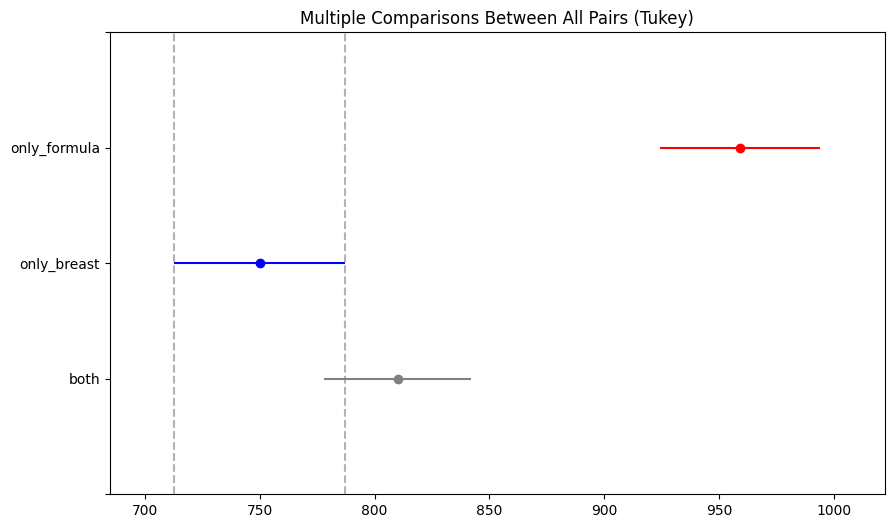

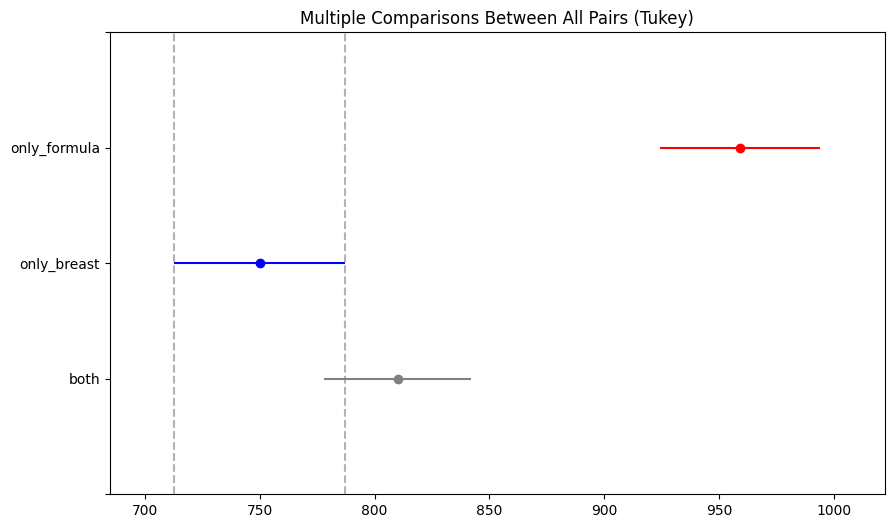

In [ ]:
tukey.plot_simultaneous(comparison_name='only_breast')

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


Для проверки отсутствия/наличия значимого перевеса между значениями в разных группах используем тест Хи-квадрат

In [ ]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values)
alfa = 0.01
print(f'p-value = {pval:.5f}, уровень значимости = {alfa}')
if pval < alfa:
  print('Отклоняем нулевую гипотезу, зависиммости в риске между группами нет')
else:
  print('Принимем нулевую гипотезу, есть зависимость в риске между группами')

p-value = 0.13099, уровень значимости = 0.01
Принимем нулевую гипотезу, есть зависимость в риске между группами


Если посмотреть на данные, то количество рискующих мужчин в каждой группе риска больше чем женшин.
Т.е. можно сделать вывод, что мужчины рискуют больше чем женщины.

<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

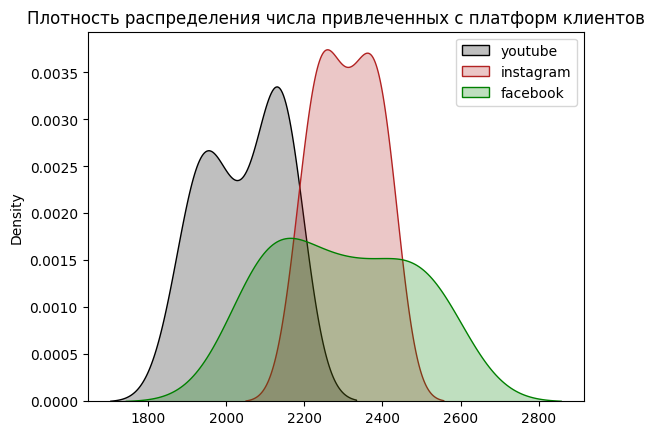

In [ ]:
# графическое представление данных
sns.kdeplot(youtube, label = 'youtube', fill = True, color = '#000000')
sns.kdeplot(instagram, label = 'instagram', fill = True, color = '#B22222')
sns.kdeplot(facebook, label = 'facebook', fill = True, color = '#008000')
plt.title('Плотность распределения числа привлеченных с платформ клиентов')
plt.legend(['youtube', 'instagram', 'facebook'], loc = 'best')

Все три распределения не похожи на нормальные. Проверю при помощи функции, написанной в п.3.1.

In [ ]:
print('Проверка распределния числа привлеченных с платформ клиентов:')
print('youtube')
check_normality(youtube)
print('instagram')
check_normality(instagram)
print('facebook')
check_normality(facebook)

Проверка распределния числа привлеченных с платформ клиентов:
youtube
Отклоняем нулевую гипотезу >> Данные распределены не нормально
instagram
Не отклоняем нулевую гипотезу >> Данные распределены нормально
facebook
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
# проверка разности вариаций в разных группах
stat, p = st.levene(youtube, instagram, facebook)
print(f'Статистика {stat}, p {p}')
if p < 0.05:
  print(f'Отклоняем нулевую гипотезу, вероятно, вариации разные')
else:
  print(f'Принимаем нулевую гипотезу, вероятно, вариации равны')

Статистика 7.887047686321957, p 0.0012354889457222914
Отклоняем нулевую гипотезу, вероятно, вариации разные


Т.к. распределения не нормальные и вариации разные, то однофакторный ANOVA не подходит, применяем Н-критерий Краскела-Уоллиса (непараметрический аналог ANOVA).

In [ ]:
stat, p = st.kruskal(youtube, instagram, facebook)
print(f'Статистика {stat:.5f}, p-value {p:.5f}')
if p < 0.05:
  print('Отклоняем нулевую гипотезу, вероятно средние различаются')
else:
  print('Принимаем нулевую гипотезу, вероятно средние одинаковые')

Статистика 22.19354, p-value 0.00002
Отклоняем нулевую гипотезу, вероятно средние различаются


In [ ]:
print(f'Количество значений в группе youtube - {len(youtube)}')
print(f'Количество значений в группе instagram - {len(instagram)}')
print(f'Количество значений в группе facebook - {len(facebook)}')

Количество значений в группе youtube - 15
Количество значений в группе instagram - 15
Количество значений в группе facebook - 15


Т.к. количество значений в выборках равно, то для более детального исследования разности наборов данных выполняем при помощи множественного сравнения - критерий Тьюки

Объединяю данные в датафрейм для передачи их потом в функцию вычисления критерия Тьюки.                      
H0 - средние значения групп равны                          
Н1 - средние значения групп различны

In [ ]:
clients_y = pd.DataFrame(youtube, columns = ['clients'])
clients_y['group'] = 'youtube'
clients_i = pd.DataFrame(instagram, columns = ['clients'])
clients_i['group'] = 'instagram'
clients_f = pd.DataFrame(facebook, columns = ['clients'])
clients_f['group'] = 'facebook'
clients = pd.concat((clients_y, clients_i, clients_f))

In [ ]:
tukey = pairwise_tukeyhsd(endog=clients['clients'].values,
                          groups=clients['group'],
                          alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
 facebook instagram   12.1333 0.9619  -98.8691  123.1358  False
 facebook   youtube -251.8667    0.0 -362.8691 -140.8642   True
instagram   youtube    -264.0    0.0 -375.0024 -152.9976   True
---------------------------------------------------------------


Исходя из результата статистически не различется количество привлеченных клиентов с facebook и instagram.

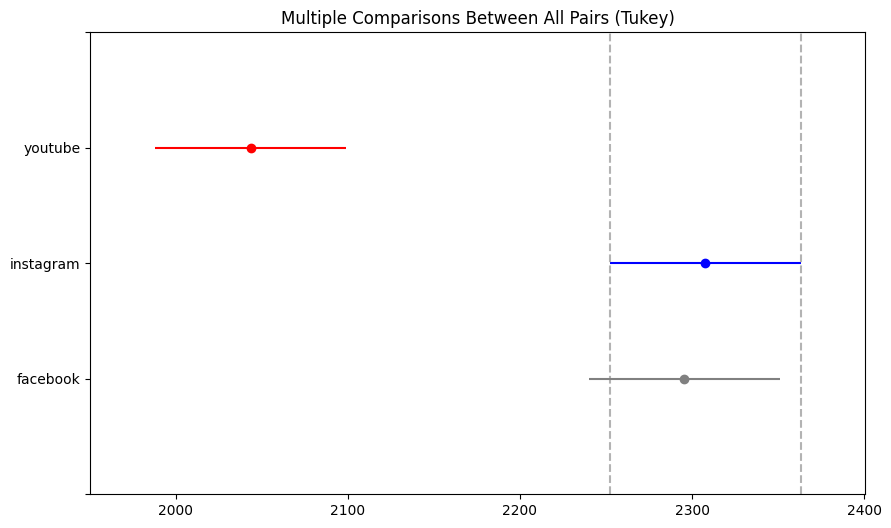

In [ ]:
tukey.plot_simultaneous(comparison_name='instagram')
plt.show()

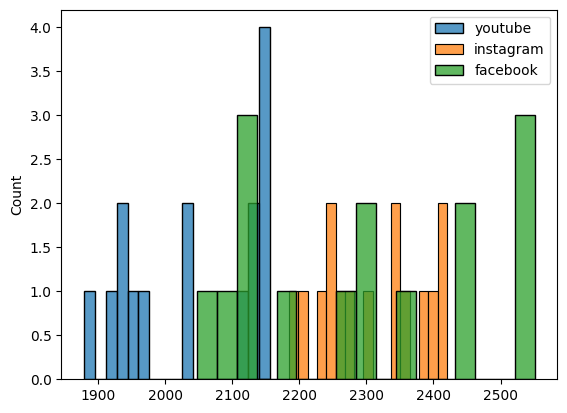

In [ ]:
# Визуализация данных
sns.histplot(youtube, bins = 17)
sns.histplot(instagram, bins = 17)
sns.histplot(facebook, bins = 17)

plt.legend(['youtube', 'instagram', 'facebook'], loc = 'best')
plt.show()

In [ ]:
x = np.arange(len(youtube))

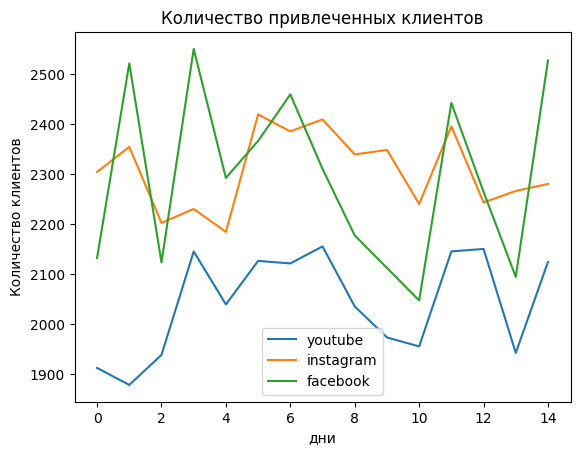

In [ ]:
plt.plot(x, youtube)
plt.plot(x, instagram)
plt.plot(x, facebook)
plt.title('Количество привлеченных клиентов')
plt.legend(['youtube', 'instagram', 'facebook'], loc = 'best')
plt.xlabel('дни')
plt.ylabel('Количество клиентов')
plt.show()

In [ ]:
print(f'Среднее число привлеченных с youtube клиентов - {np.mean(youtube):.2f}, стандартное отклонение - {np.std(youtube):.2f}')
print(f'Среднее число привлеченных с instagram клиентов - {np.mean(instagram):.2f}, стандартное отклонение - {np.std(instagram):.2f}')
print(f'Среднее число привлеченных с facebook клиентов - {np.mean(facebook):.2f}, стандартное отклонение - {np.std(facebook):.2f}')

Среднее число привлеченных с youtube клиентов - 2043.53, стандартное отклонение - 97.53
Среднее число привлеченных с instagram клиентов - 2307.53, стандартное отклонение - 75.18
Среднее число привлеченных с facebook клиентов - 2295.40, стандартное отклонение - 169.34


Выводы.           
Количество привлекаемых с Youtube клиентов статистически значимо отличается от других платформ. Причем в среднем оно меньше других, и стандартное отклонение у нее довольно высоко. Возможно стоит пересмотреть место/время размещения рекламы или проработать целевую аудиторию для того чтобы повысить количество клиентов с youtube.